版权声明：本材料是南开大学“非线性物理学导论”课程课件，版权归课程老师朱开恩所有。允许拷贝、分发使用，允许修改，但是请保留此版权声明。

版本时间：2019年9月

# 课程大纲
1. 引言
1. 从振动的周期解到混沌吸引子
1. 稳定系分析与分岔图
1. Logistic映射与倍周期分岔
1. Julia集合和Mandelbrot集合
1. 几种分形模型及其分形维数
1. 圆映射
1. 倍周期分岔的符号动力学
1. 保守系统中的混沌
1. 斑图
1. 复杂系统
1. 元胞自动机
1. 协同学

In [9]:
%matplotlib tk

In [1]:
%matplotlib inline

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 轨道的分类

## 不动点

### 阻尼震动
$$m\frac{d^2 x}{dt^2}=-k x - \alpha \frac{dx}{dt}$$
$$\frac{d^2 x}{dt^2}=-\frac{k}{m} x - \frac{\alpha}{m} \frac{dx}{dt}$$
$$\frac{d^2 x}{dt^2}=-\mu x - \alpha_{m} \frac{dx}{dt}$$

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\mu x - \alpha_m v$$

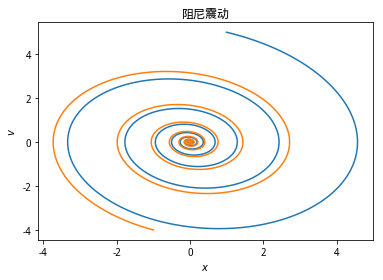

In [3]:
mu = 1.0
alpha_m = 0.2

def oscillation_damped(w,t, mu, alpha_m):
    x,v=w
    return np.array([v, - mu*x - alpha_m * v])

paras = (mu, alpha_m)


step = 0.01
t     = np.arange(0.0,150, step)
track = odeint(oscillation_damped,(1.0,5.0),t,args=paras)
track2 = odeint(oscillation_damped,(-1.0,-4.0),t,args=paras)


plt.plot(track[:,0], track[:,1])
plt.plot(track2[:,0], track2[:,1])

plt.title("阻尼震动")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

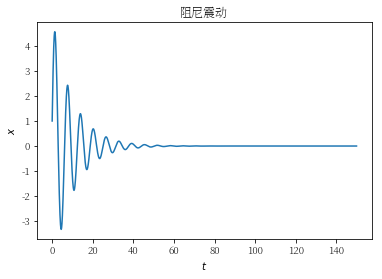

In [3]:
plt.plot(t, track[:,0])

plt.title("阻尼震动")
plt.xlabel("$t$")
plt.ylabel("$x$")

plt.show()

### 鞍点
<img src="saddle_point.png" />

## 极限环

### 无阻尼震动
$m\frac{d^2 x}{dt^2}=-k x$

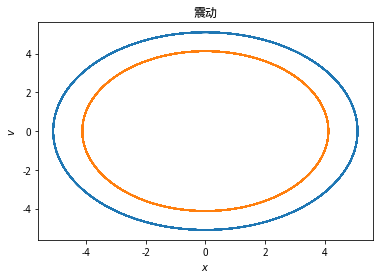

In [2]:
mu = 1.0

def oscillation(w,t, mu):
    x,v=w
    return np.array([v, - mu*x])

paras = (mu,)


step = 0.01
t     = np.arange(0.0,150, step)
track = odeint(oscillation,(1.0,5.0),t,args=paras)
track2 = odeint(oscillation,(-1.0,-4.0),t,args=paras)


plt.plot(track[:,0], track[:,1])
plt.plot(track2[:,0], track2[:,1])

plt.title("震动")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

### Van der Pol oscillator
$\frac{d^2 x}{dt^2}-\mu (1-x^2)\frac{dx}{dt}+x=0$

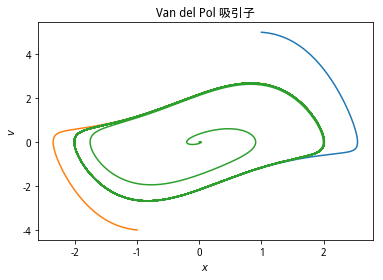

In [5]:
mu = 1.0

def Van_de_Pol(w,t, mu):
    x,v=w
    return np.array([v, mu*(1-x**2)*v - x])

paras = (mu,)


step = 0.01
# get orbit
t     = np.arange(0.0,150, step)
track = odeint(Van_de_Pol,(1.0,5.0),t,args=paras)
track2 = odeint(Van_de_Pol,(-1.0,-4.0),t,args=paras)
track3 = odeint(Van_de_Pol,(0.0,0.01),t,args=paras)


plt.plot(track[:,0], track[:,1])
plt.plot(track2[:,0], track2[:,1])
plt.plot(track3[:,0], track3[:,1])

plt.title("Van del Pol 吸引子")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

## 准周期解
例子：环上小周期和大周期没有公倍数

## 混沌

### Lorenz方程组

\begin{eqnarray*}
  \dot{x} & = & \sigma (y - x)\\
  \dot{y} & = & x (\rho - z) - y\\
  \dot{z} & = & x y - \beta z
\end{eqnarray*}

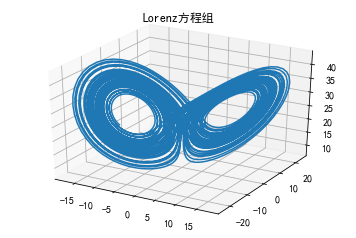

In [2]:
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

def Lorenz(w,t, sigma, rho, beta):
    x,y,z=w
    return np.array([-sigma*(x-y), -x*z+rho*x-y, x*y-beta*z])

paras = (sigma, rho, beta)

# discard data to get new initial condition on the attractor
step = 0.01
discard_t_array  = np.arange(0.0,200.0, step) 
discard_track = odeint(Lorenz,(5.0,0.0,0.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0,50, step)
track = odeint(Lorenz,discard_track[-1],t,args=paras)


plt.gca(projection='3d')#, aspect='equal')
plt.plot(track[:,0],track[:,1],track[:,2])
#plt.plot(track[:,0], track[:,1])

plt.title("Lorenz方程组")
#plt.xlabel("时间(秒)")
#plt.ylabel("震度角度(弧度)")

plt.show()

In [3]:
%matplotlib
plt.gca(projection='3d')#, aspect='equal')
plt.plot(track[:,0],track[:,1],track[:,2])
plt.show()

Using matplotlib backend: TkAgg


In [4]:
%matplotlib inline 

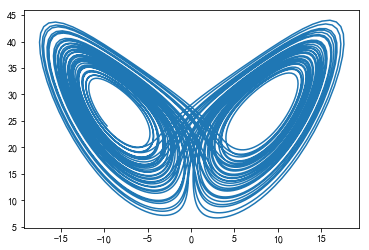

In [5]:
plt.plot(track[:,0], track[:,2])
plt.show()

In [6]:
np.min(track[:,0]), np.max(track[:,0])

(-17.479643721575897, 17.649083083875524)

In [7]:
np.min(track[:,1]), np.max(track[:,1])

(-23.208554919345016, 23.520326443428168)

In [8]:
np.min(track[:,2]), np.max(track[:,2])

(6.6608106430911755, 44.026366399464067)

# 混沌的初始条件敏感性

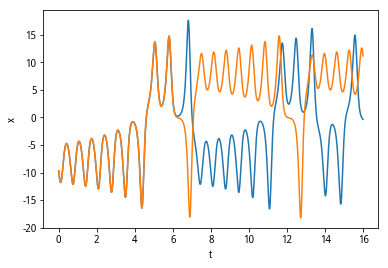

In [7]:
t     = np.arange(0.0,50, step)
delta = np.array([0.0, 0.0, 0.01])
track_delta = odeint(Lorenz,discard_track[-1] + delta,t,args=paras)

cut_size = int(16/step)
plt.plot(t[:cut_size],   track[:,0][:cut_size])
plt.plot(t[:cut_size],   track_delta[:,0][:cut_size])

plt.xlabel("t")
plt.ylabel("x")
plt.show()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


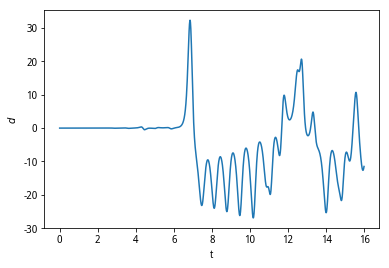

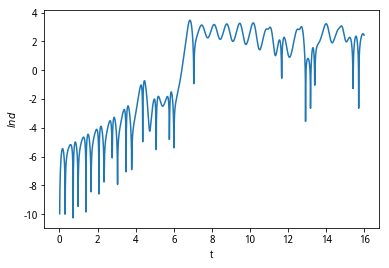

In [8]:
distance = track[:,0][:cut_size] - track_delta[:,0][:cut_size]
plt.plot(t[:cut_size],   distance)
plt.xlabel("t")
plt.ylabel("$d$")

distance = np.log(abs(distance))
plt.figure()
plt.plot(t[:cut_size],   distance)
plt.xlabel("t")
plt.ylabel("$ln d$")
plt.show()

# 混沌的随机性

分布

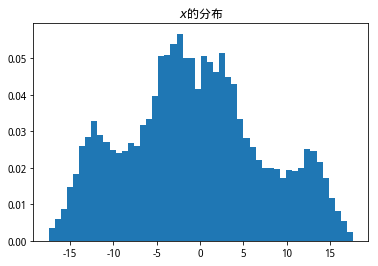

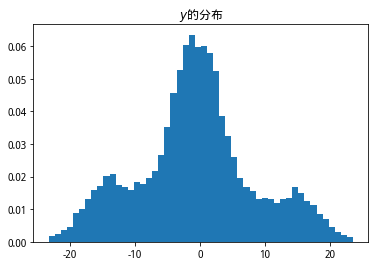

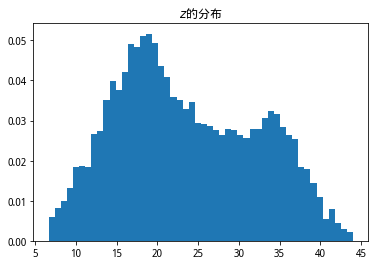

In [9]:
bin_size = 50    # 50个bins
plt.hist(track[:,0], bin_size, normed=True)
plt.title("$x$的分布")
plt.figure()
plt.hist(track[:,1], bin_size, normed=True)
plt.title("$y$的分布")
plt.figure()
plt.hist(track[:,2], bin_size, normed=True)
plt.title("$z$的分布")
plt.show()

In [10]:
t2     = np.arange(0.0,5000, step)
track2 = odeint(Lorenz,discard_track[-1],t2,args=paras)

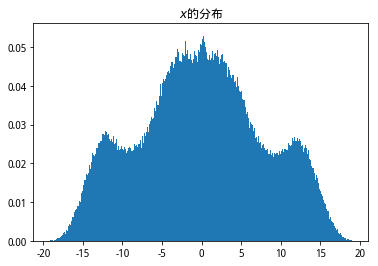

In [11]:
bin_size = 500    # 50个bins
plt.hist(track2[:,0], bin_size, normed=True)
plt.title("$x$的分布")
plt.show()

# 混沌的回归性

# 混沌的遍历性

# 斯梅尔马蹄(Smale's horseshoe)

<img src="Smale_Horseshoe_Map.svg.png" />

# 行星环与混沌吸引子比较

<img src="行星环1.jpg" />
<img src="行星环2.jpg" />
<img src="行星环3.jpg" />

# 其它几个典型的混沌吸引子

## 自治系统

### Rössler system
https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

\begin{eqnarray*}
  \dot{x} & = & -y - z\\
  \dot{y} & = & x + a y\\
  \dot{z} & = & b+z(x-c)
\end{eqnarray*}

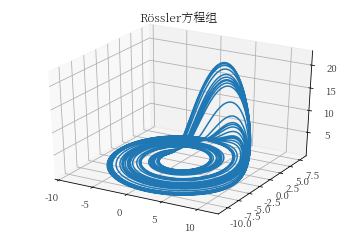

In [5]:
a = 0.2
b = 0.2
c = 5.7

def Rossler(w,t, a,b,c):
    x,y,z=w
    return np.array([-y-z, x+a*y, b+z*(x-c)])

paras = (a,b,c)

# discard data to get new initial condition on the attractor
step = 0.01
discard_t_array  = np.arange(0.0,200.0, step) 
discard_track = odeint(Rossler,(5.0,0.0,0.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0,200, step)
track = odeint(Rossler,discard_track[-1],t,args=paras)


plt.gca(projection='3d')
plt.plot(track[:,0],track[:,1],track[:,2])
#plt.plot(track[:,0], track[:,1])
#plt.plot(track[:,0], track[:,2])

plt.title("Rössler方程组")


plt.show()

### Modified Chua chaotic attractor
https://en.wikipedia.org/wiki/Multiscroll_attractor

\begin{eqnarray*}
  \dot{x} & = & \alpha [y + b \sin(\frac{\pi x}{2a}+d)]\\
  \dot{y} & = & x - y + z\\
  \dot{z} & = & -\beta y
\end{eqnarray*}

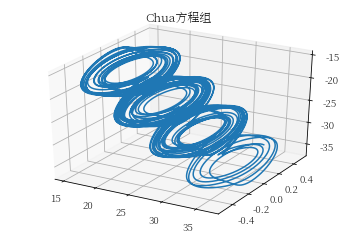

In [6]:
a = 1.3
b = 0.11
c = 7.0
d = 0.0
alpha = 10.82
beta = 14.286

def Chua(w,t, alpha, beta, a,b,c,d):
    x,y,z=w
    return np.array([alpha*(y+b*np.sin(np.pi*x/2/a+d)), x-y+z, -beta*y])

paras = (alpha, beta, a,b,c,d)

# discard data to get new initial condition on the attractor
step = 0.01
discard_t_array  = np.arange(0.0,200.0, step) 
discard_track = odeint(Chua,(1.0, 1.0, 0.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0,200, step)
track = odeint(Chua,discard_track[-1],t,args=paras)


plt.gca(projection='3d')
plt.plot(track[:,0],track[:,1],track[:,2])
#plt.plot(track[:,0], track[:,1])
#plt.plot(track[:,0], track[:,2])

plt.title("Chua方程组")


plt.show()

### Forced Van der Pol oscillator
$\frac{d^2 x}{dt^2}-\mu (1-x^2)\frac{dx}{dt}+x= F \cos(\omega t)$

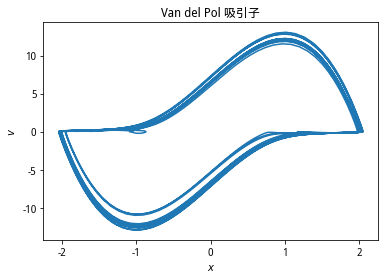

In [14]:
mu = 8.53
omega = 2*np.pi/10.0
F = 1.2

def Van_de_Pol(w,t, mu, omega, F):
    x,v=w
    return np.array([v, mu*(1-x**2)*v - x + F*np.cos(omega*t)])

paras = (mu,omega,F)


step = 0.01
discard_t_array  = np.arange(0.0,200.0, step) 
discard_track = odeint(Van_de_Pol,(1.0,5.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0,200, step)
track = odeint(Van_de_Pol,discard_track[-1],t,args=paras)


plt.plot(track[:,0], track[:,1])

plt.title("Van del Pol 吸引子")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

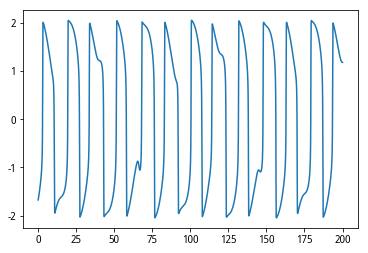

In [22]:
plt.plot(t, track[:,0])
plt.show()

### Forced Duffing oscillator
$\frac{d^2 x}{dt^2}+\delta \frac{dx}{dt}+\alpha x + \beta x^3= \gamma \cos(\omega t)$

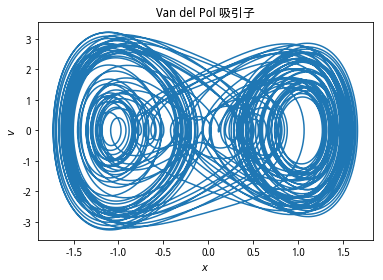

In [15]:
delta = 0.02
alpha = 1.0
beta  = 5.0
gamma = 8.0
omega = 0.5

def Duffing(w,t, delta, alpha, beta, omega, gamma):
    x,v=w
    return np.array([v, -delta*v - alpha*x-beta*x**3+ gamma*np.cos(omega*t)])

paras = (delta, alpha, beta, omega, gamma)


step = 0.01
discard_t_array  = np.arange(0.0,200.0, step) 
discard_track = odeint(Duffing,(1.0,5.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0,200, step)
track = odeint(Duffing,discard_track[-1],t,args=paras)


plt.plot(track[:,0], track[:,1])

plt.title("Van del Pol 吸引子")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

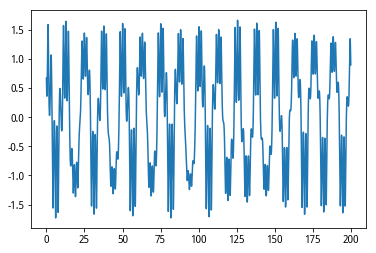

In [16]:
plt.plot(t, track[:,0])
plt.show()